In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [115]:
df = pd.read_csv("D:/Data Analysis/Files/export.csv")

In [116]:
print("Total reported days:", len(df))

Total reported days: 1828


In [117]:
# I want to drop columns which are empty
df.drop(columns=['snow', 'wdir', 'snow', 'wdir', 'wpgt', 'tsun'], inplace=True) # Manually dropping empty columns
df.dropna(how='all', inplace=True, axis=1)  # Alternative way to drop empty columns
cleaned_columns = df.columns.tolist()
print("Columns after cleaning:", cleaned_columns)

Columns after cleaning: ['date', 'tavg', 'tmin', 'tmax', 'prcp', 'wspd', 'pres']


In [118]:
# Filling NaNs with 0
df['prcp'] = df['prcp'].fillna(0)
df = df[df['prcp'] < 40]
print(len(df))

1827


In [119]:
fake_rows = df[
    (df['tavg'] == df['tmax']) |
    (df['tmax'] == df['tmin']) |
    (df['prcp'] > 50.0)
]
print("Number of fake rows detected:", len(fake_rows))

Number of fake rows detected: 0


In [120]:
df["date"] = pd.to_datetime(df["date"])
print(df.head(10))

        date  tavg  tmin  tmax  prcp  wspd    pres
0 2020-01-01   2.0  -2.0   8.9   0.0   5.2  1019.6
1 2020-01-02   3.4  -1.0   8.0   0.0   5.3  1019.8
2 2020-01-03   4.7   2.8   7.0   0.0   5.6  1023.3
3 2020-01-04   5.1   1.0  11.0   0.0   6.6  1022.1
4 2020-01-05   4.9   1.0  10.0   0.0   6.8  1015.6
5 2020-01-06   1.5   0.0   3.2   0.0   5.7  1019.2
6 2020-01-07   1.3   0.0   3.0   0.0   6.4  1027.7
7 2020-01-08   1.9  -0.6   4.0   1.8   6.0  1028.3
8 2020-01-09   2.4  -1.0   7.0   0.0   9.6  1022.4
9 2020-01-10   5.1  -1.0   9.3   0.0   7.3  1018.1


In [121]:
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year 

In [122]:
# Now lets exclude data for 2025 
df = df[df["year"] < 2025]

In [123]:
# Now lets analyze total counts rains per year
prcp_days = df[df["prcp"] > 0.5].groupby("year")["prcp"].count()
print(prcp_days)

year
2020    32
2021    25
2022    66
2023    78
2024    86
Name: prcp, dtype: int64


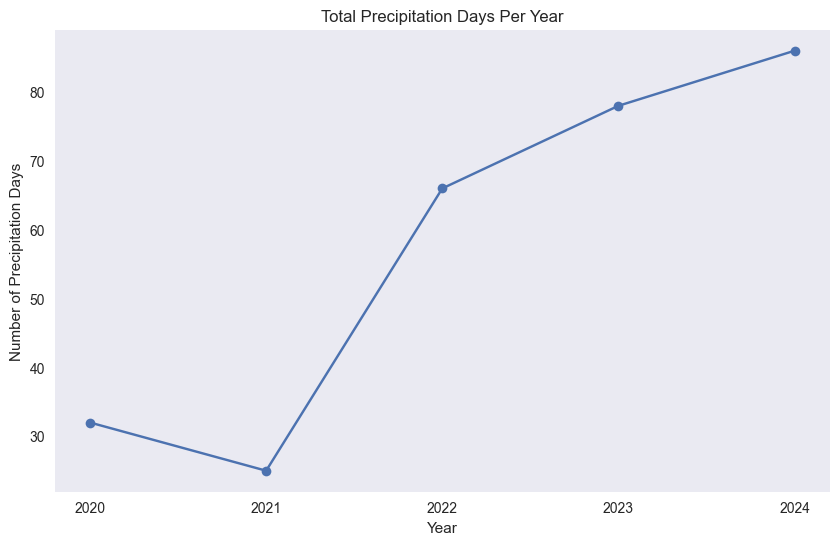

In [124]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prcp_days.index, prcp_days.values, marker='o')
ax.set_title("Total Precipitation Days Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Precipitation Days")
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid()
plt.show()


In [125]:
snowy_per_year = df[(df["tavg"] < 3) & (df["prcp"] > 0.5)].groupby("year")["prcp"].count()

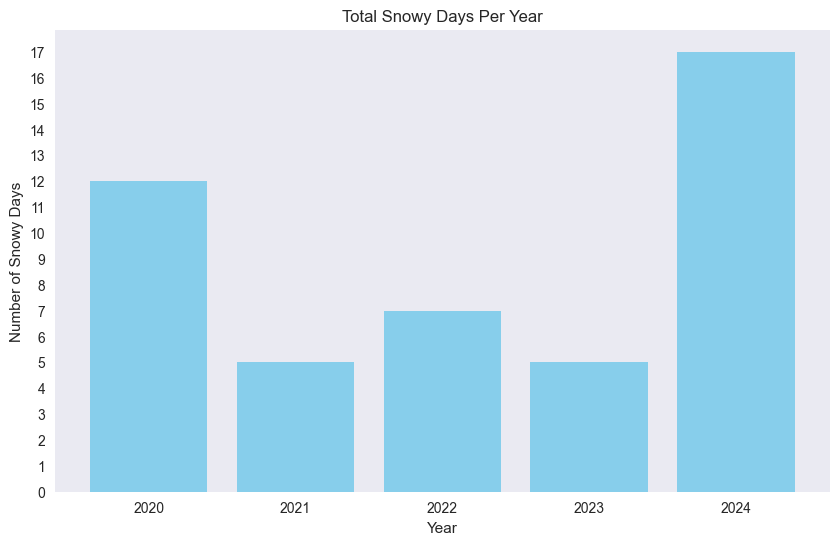

In [126]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(snowy_per_year.index, snowy_per_year.values, color='skyblue')
ax.set_title("Total Snowy Days Per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Snowy Days")
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.grid()
plt.show()


Visualizing the Rain

In [127]:
df['date'] = pd.to_datetime(df['date'])

rainy_days = df[(df['prcp'] > 0.5) & (df['tavg'] > 3)][['date', 'prcp']].copy() # we take where it rained and temp > 3C to deminish snow effect

print(rainy_days.head())

         date  prcp
19 2020-01-20   2.0
40 2020-02-10  23.9
52 2020-02-22   1.0
64 2020-03-05   2.0
80 2020-03-21  20.1


In [128]:
# Preparing data for plotting
# We set everything to year 2000 so 29 Feb works fine
rainy_days['plot_date'] = rainy_days['date'].apply(lambda d: d.replace(year=2000))

# Extract the real year so we can group by it later
rainy_days['real_year'] = rainy_days['date'].dt.year

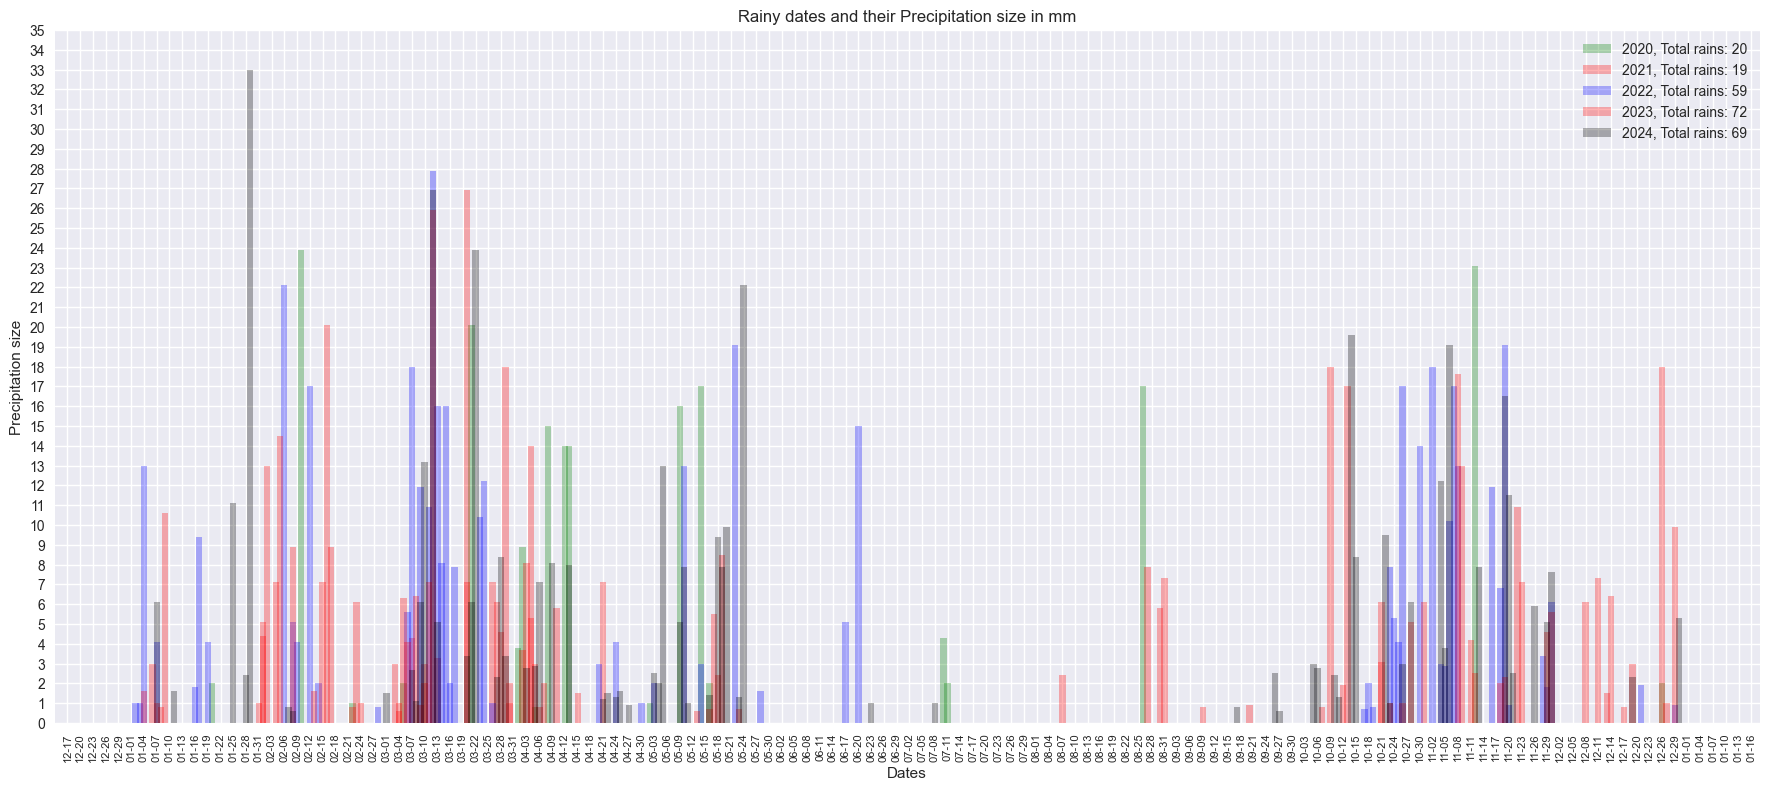

In [129]:
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(22, 9))

colors = {2020: 'green', 2021: 'red', 2022: 'blue', 2023: 'red', 2024: 'black'}

# Getting list of years present in data
years = sorted(rainy_days['real_year'].unique())

for year in years:
    # Getting data just for that year
    subset = rainy_days[rainy_days['real_year'] == year]
    # Visualizing
    ax.bar(subset['plot_date'], subset['prcp'], 
           label=f"{year}, Total rains: {len(subset)}",
           color=colors.get(year, 'gray'), # Gray if year not in color dict
           width=1.5, 
           alpha=0.3)

ax.set_ylim(0, 35)
ax.set_xlabel("Dates")
ax.set_ylabel("Precipitation size")
ax.set_title("Rainy dates and their Precipitation size in mm")
ax.legend()

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90, size=8)

plt.show()

Wind Visualization

In [130]:
df['wspd'] = df['wspd'].fillna(0)

# Create the "Fake Date" for overlaying years (Setting everything to Year 2000)
df['plot_date'] = df['date'].apply(lambda d: d.replace(year=2000))

# Extract real year for the loop
df['real_year'] = df['date'].dt.year


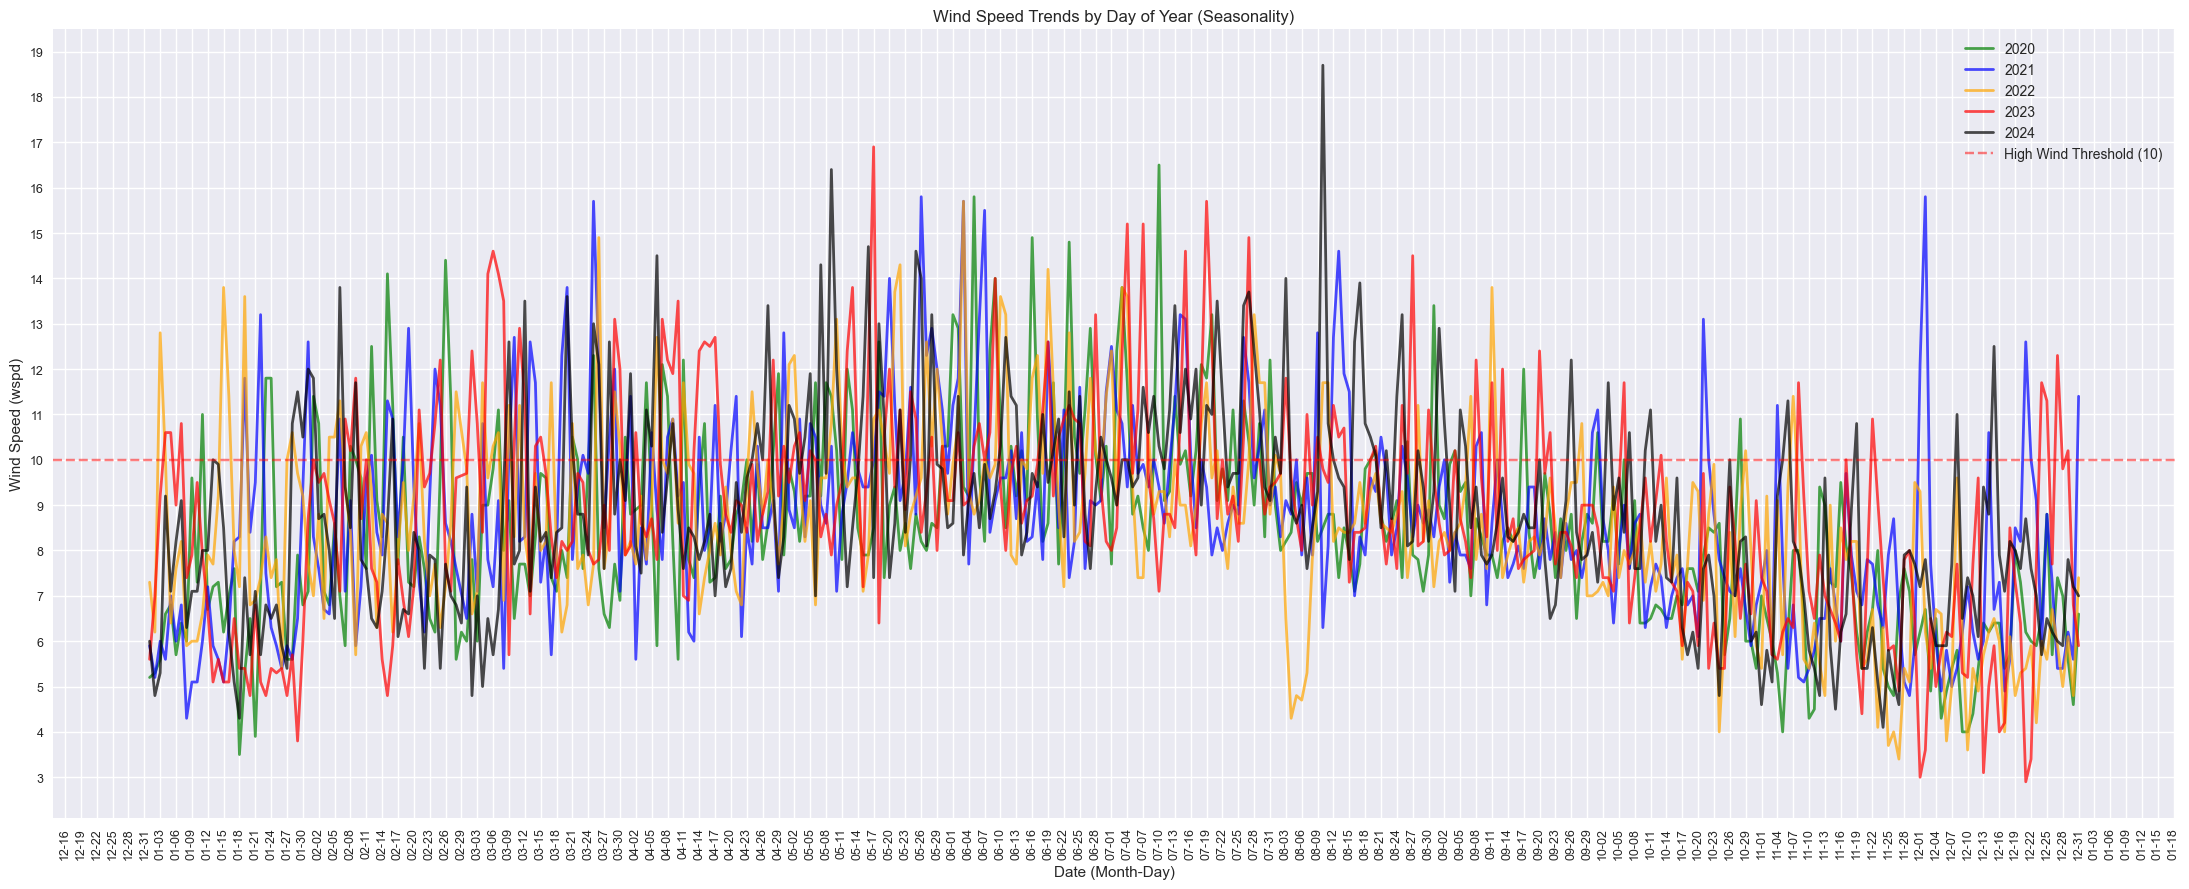

In [131]:
# Setup Canvas
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(22, 9))

colors = {2020: 'green', 2021: 'blue', 2022: 'orange', 2023: 'red', 2024: 'black'}

years = sorted(df['real_year'].unique())

for year in years:
    subset = df[df['real_year'] == year]
    
    ax.plot(subset['plot_date'], subset['wspd'], 
            label=f"{year}", 
            color=colors.get(year, 'gray'),
            linewidth=2, 
            alpha=0.7)

ax.set_title("Wind Speed Trends by Day of Year (Seasonality)")
ax.set_ylabel("Wind Speed (wspd)")
ax.set_xlabel("Date (Month-Day)")


# 23.9 is the highest so I marked 10 as treshold
ax.axhline(y=10, color='red', linestyle='--', alpha=0.5, label='High Wind Threshold (10)')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3)) # Show date every 3 days
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xticks(rotation=90, size=9)
plt.yticks(size=9)

ax.legend()
plt.tight_layout()
plt.show()

In [132]:
# Summary statistics for wind speed
"""So the wind data for 2021 and 2021 seems to be corrupt due to fact that these years we had Quarantine and lockdowns so less data was recorded.
But I still recorded data so you can see by yourself the difference in line graphs."""

'So the wind data for 2021 and 2021 seems to be corrupt due to fact that these years we had Quarantine and lockdowns so less data was recorded.\nBut I still recorded data so you can see by yourself the difference in line graphs.'